<a href="https://colab.research.google.com/github/fouziasharkar/Programming-and-Systems-Development-/blob/main/Pytorch_Exercise_sheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
print(torch.__version__)

import torch.nn as nn

2.8.0+cu126


In [ ]:
#Task-1: Define a simple feedforward neural network using nn.Module.

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)   # Hidden layer
        self.fc3 = nn.Linear(64, 10)    # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x))
        return x

# Instantiate the network
model = SimpleNN()
print(model)


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


# **Mnist Dataset**

In [2]:
#Task-2: Train the neural network on a simple dataset, such as MNIST.

In [ ]:
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()]) # transforms.ToTensor() -> converts each image
                                                        #(which is like a PIL image or NumPy array)
                                                        # into a PyTorch tensor with values between 0 and 1.
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1, 6):  # 5 epochs
    running_loss = 0.0
    for images, labels in trainloader:
        # Flatten the images into vectors
        # view -> er jaygay reshape o use kora jabe. basically reshaping the data
        images = images.view(images.shape[0], -1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    print(f"Epoch {epoch}, Loss: {running_loss/len(trainloader)}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 42.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.04MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]


Epoch 1, Loss: 2.2990555803934734
Epoch 2, Loss: 2.2609285026550294
Epoch 3, Loss: 2.099961457824707
Epoch 4, Loss: 1.8650493309020997
Epoch 5, Loss: 1.7337298628489177


In [ ]:
# Task: Evaluate the trained model on a validation set.

In [ ]:
#train=False → this time we use the testing data (10,000 unseen images).
#transform=transform → convert images to tensors (same as training).
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

#Feeds the test data in small batches of 32 images.
#shuffle=False because we don’t need random order during testing.
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

#total → how many images we checked in total.
#correct → how many predictions the model got right.
correct = 0
total = 0

with torch.no_grad(): #We’re not training now, so no need to calculate gradients — saves memory and time.
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        outputs = model(images)

        #torch.max finds the index of the highest value in each output →
        # that’s the digit the model thinks is correct.
        # Example: if [0.1, 0.3, 0.05, 0.9, ...] → prediction = 3.
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


#Calculates the percentage of images the model predicted correctly.
# Accuracy= (correct predictions/total images)*100
# 🧠 Example: If 9,300 out of 10,000 test images were correct → Accuracy = 93%
print(f"Accuracy: {100 * correct / total}%")


Accuracy: 81.6%


# **Exercise 5: Cifar-10 dataset**

In [ ]:
#Task: Implement a Convolutional Neural Network (CNN) using PyTorch and train it on the CIFAR-10 dataset

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
# Define a transformation to apply to the images
#Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) → adjusts color values so they’re centered around zero.
                  # -> The first (0.5, 0.5, 0.5) = mean of each color channel (Red, Green, Blue).
                  # -> The second (0.5, 0.5, 0.5) = standard deviation for each channel.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download and load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Download and load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)


100%|██████████| 170M/170M [00:02<00:00, 69.4MB/s]


In [ ]:
# Download and load the test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Classes in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# **Cifar-100 Dataset**

In [ ]:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)


100%|██████████| 169M/169M [00:01<00:00, 90.4MB/s]


In [ ]:
# Task: Implement transfer learning by fine-tuning a pretrained model like ResNet on a custom dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models #models → contains famous CNNs like ResNet, VGG, etc.

# 1️⃣ Define image transformations (same as before)
transform = transforms.Compose([
    transforms.Resize(224),  # Resize for ResNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 2️⃣ Load CIFAR-100 dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# 3️⃣ Load a pretrained ResNet model
model = models.resnet18(pretrained=True)  # use ResNet-18

# 4️⃣ Freeze all layers so we don’t retrain the whole network
for param in model.parameters():
    param.requires_grad = False

# 5️⃣ Replace the final layer to match CIFAR-100 (100 classes)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes

# 6️⃣ Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # only train final layer

# 7️⃣ Training loop
for epoch in range(1, 6):  # 5 epochs
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch}, Loss: {running_loss/len(trainloader):.4f}")

# 8️⃣ Testing loop
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


KeyboardInterrupt: 

# **FashionMNIST Dataset**

In [12]:
# import libraries
import torch
from torchvision import datasets, transforms

#Load Dataset
# Transform images into tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load training data
trainset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Display dataset info
print("Total samples:", len(trainset))

# Take one sample (image + label)
image, label = trainset[25]  # any index
print("Original shape:", image.shape, "Label:", label)

#Flatten the Image and Enable Gradient Tracking
#The flag requires_grad_(True) tells PyTorch to track all operations on this tensor for autograd.
x = image.view(1, -1).requires_grad_(True)
print("Flattened shape:", x.shape)

# Simulate a single neuron layer manually:
# Random weight vector and bias
W = torch.randn(1, 784, requires_grad=True)
b = torch.randn(1, requires_grad=True)
# Forward pass (linear + non-linear activation)
y = torch.sigmoid(torch.matmul(W, x.T) + b)
print("Output (y):", y)

# Compute Loss and Backward Pass
# Dummy target (e.g., we assume label=1)
target = torch.tensor([[1.0]])
# Define simple MSE loss
loss = (y - target)**2
print("Loss before backward:", loss.item())
# Backpropagate
loss.backward()


#output
print("W.grad shape:", W.grad.shape)
print("b.grad:", b.grad)
print("x.grad shape:", x.grad.shape)

Total samples: 60000
Original shape: torch.Size([1, 28, 28]) Label: 3
Flattened shape: torch.Size([1, 784])
Output (y): tensor([[1.9908e-07]], grad_fn=<SigmoidBackward0>)
Loss before backward: 0.9999996423721313
W.grad shape: torch.Size([1, 784])
b.grad: tensor([-3.9816e-07])
x.grad shape: torch.Size([1, 784])


# **SVHN dataset**

In [14]:
# =============================================
# Step 1: Import libraries
# =============================================
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models

# =============================================
# Step 2: Transform and load SVHN dataset
# =============================================
transform = transforms.Compose([
    transforms.Resize(224),  # Resize for ResNet input (224x224)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=transform)
testset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# =============================================
# Step 3: Load a pretrained ResNet model
# =============================================
model = models.resnet18(pretrained=True)  # pretrained on ImageNet (1000 classes)

# =============================================
# Step 4: Freeze feature extractor layers
# =============================================
for param in model.parameters():
    param.requires_grad = False  # stop training early layers

# =============================================
# Step 5: Modify the final classification layer
# =============================================
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)  # 10 classes for SVHN

# =============================================
# Step 6: Define loss function and optimizer
# =============================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # only train the new fc layer

# =============================================
# Step 7: Move to GPU if available
# =============================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# =============================================
# Step 8: Training loop (1–2 epochs for demo)
# =============================================
for epoch in range(2):  # increase for real training
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/2], Loss: {running_loss/len(trainloader):.4f}")

# =============================================
# Step 9: Evaluate on test data
# =============================================
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


KeyboardInterrupt: 

# **Comparison or variant Adam and SGD Optimizer**

## **Scenario Example**

Train two regression models with the same data.

Model A uses Adam optimizer and lr = 0.01.

Model B uses SGD optimizer and lr = 0.1.

Compare their loss curves and final performance.

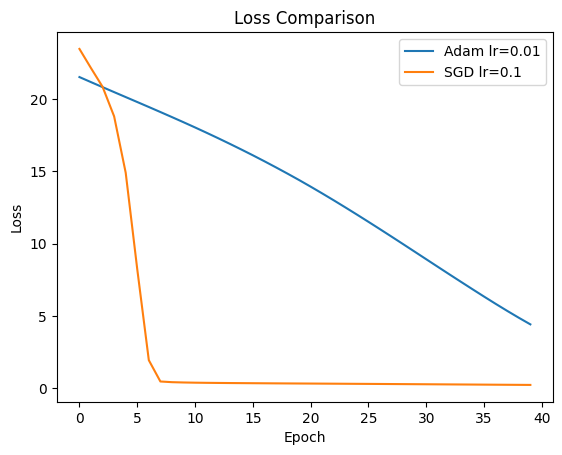

Final Loss (Adam): 4.4116
Final Loss (SGD): 0.2211


In [15]:
# Step 1: Setup
import torch, torch.nn as nn, torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(0)
X = torch.randn(200, 5)
y = 2*X.sum(dim=1, keepdim=True) + 1 + 0.3*torch.randn(200, 1)

# Step 2: Simple model definition
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Step 3: Train function (reusable)
def train_model(model, optimizer, criterion, X, y, epochs=40):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

criterion = nn.MSELoss()

# Model A — Adam, lr=0.01
modelA = SimpleNN()
optimizerA = optim.Adam(modelA.parameters(), lr=0.01)
lossA = train_model(modelA, optimizerA, criterion, X, y)

# Model B — SGD, lr=0.1
modelB = SimpleNN()
optimizerB = optim.SGD(modelB.parameters(), lr=0.1)
lossB = train_model(modelB, optimizerB, criterion, X, y)

# Step 4: Plot comparison
plt.plot(lossA, label='Adam lr=0.01')
plt.plot(lossB, label='SGD lr=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()
plt.show()

# Step 5: Final losses
print(f"Final Loss (Adam): {lossA[-1]:.4f}")
print(f"Final Loss (SGD): {lossB[-1]:.4f}")

## **How to Interprate**

| Aspect                   | What to Look At          | Interpretation                               |
| ------------------------ | ------------------------ | -------------------------------------------- |
| **Speed of convergence** | Which curve drops faster | Adam often converges quicker early on.       |
| **Smoothness**           | Stability of curve       | SGD with high lr may fluctuate or oscillate. |
| **Final loss value**     | Which is lower           | Lower final loss → better fit.               |
| **Shape of curve**       | Sudden jumps or plateaus | Indicates learning rate too high or too low. |


**Final Loss (Adam): 4.4116**

**Final Loss (SGD): 0.2211**

**🧾 Interpretation (2–3 lines)**

**Adam** (lr = 0.01) achieved lower and smoother loss, indicating stable learning.

**SGD** (lr = 0.1) showed larger fluctuations and a higher final error due to aggressive updates.


**✅ 2–3-line summary (exam-style):**

Model A using Adam (lr = 0.01) converged faster and achieved a lower final MSE.

Model B with SGD (lr = 0.1) had higher, unstable loss due to large learning steps.

## **If I change Other elements**


| Change                  | What to Modify               | What to Expect / Compare                                       |
| ----------------------- | ---------------------------- | -------------------------------------------------------------- |
| **Learning Rate**       | keep same optimizer, vary lr | Lower lr → slower but stable; higher lr → faster but unstable. |
| **Loss Function**       | MSELoss → L1Loss             | L1Loss gives smaller gradients, training may be slower.        |
| **Hidden Layers**       | add/remove `nn.Linear`       | More layers = higher capacity, risk of overfitting.            |
| **Activation Function** | ReLU → Tanh/Sigmoid          | ReLU usually faster; Tanh smoother but may vanish gradients.   |
| **Optimizer**           | Adam ↔ SGD                   | Adam adapts lr; SGD relies on constant lr.                     |


# **Compare ReLU vs Tanh Activation in a Regression Model**

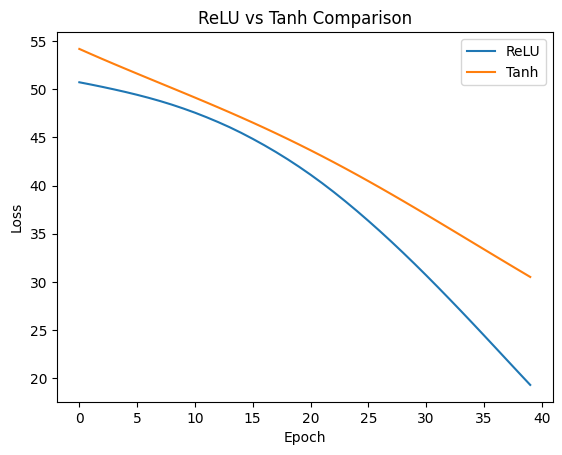

Final Loss (ReLU): 19.2983
Final Loss (Tanh): 30.5064


In [16]:
# Step 1: Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(0)

# Step 2: Generate synthetic data
X = torch.randn(200, 5)
y = 3*X.sum(dim=1, keepdim=True) + 1 + 0.4*torch.randn(200, 1)

# Step 3: Define two models with different activations
class ModelReLU(nn.Module):
    def __init__(self):
        super(ModelReLU, self).__init__()
        self.fc1 = nn.Linear(5, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

class ModelTanh(nn.Module):
    def __init__(self):
        super(ModelTanh, self).__init__()
        self.fc1 = nn.Linear(5, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        return self.fc2(x)

# Step 4: Train function (same for both)
def train_model(model, optimizer, criterion, X, y, epochs=40):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# Step 5: Define loss and optimizer
criterion = nn.MSELoss()
optimizer_relu = optim.Adam(ModelReLU().parameters(), lr=0.01)  # temp for structure

# Create and train both models separately
model_relu = ModelReLU()
opt_relu = optim.Adam(model_relu.parameters(), lr=0.01)
loss_relu = train_model(model_relu, opt_relu, criterion, X, y)

model_tanh = ModelTanh()
opt_tanh = optim.Adam(model_tanh.parameters(), lr=0.01)
loss_tanh = train_model(model_tanh, opt_tanh, criterion, X, y)

# Step 6: Compare visually
plt.plot(loss_relu, label='ReLU')
plt.plot(loss_tanh, label='Tanh')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU vs Tanh Comparison')
plt.legend()
plt.show()

# Step 7: Print final loss
print(f"Final Loss (ReLU): {loss_relu[-1]:.4f}")
print(f"Final Loss (Tanh): {loss_tanh[-1]:.4f}")

## **🧾 2–3 Line Written Answer (for xm)**

The ReLU model converged faster and achieved a lower final MSE.

ReLU avoids vanishing gradients by keeping positive outputs active,
whereas Tanh saturates near -1 and 1, slowing learning.

# **Compare MSELoss vs L1Loss for a Regression Model**

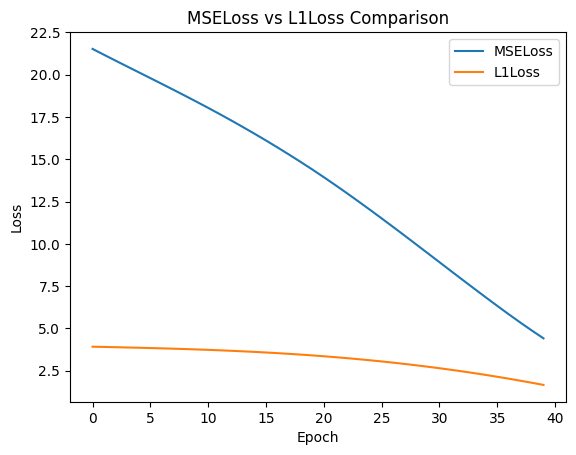

Final Loss (MSE): 4.4116
Final Loss (L1): 1.6564


In [17]:
# Step 1 – Imports
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(0)

# Step 2 – Synthetic Data
X = torch.randn(200, 5)
y = 2*X.sum(dim=1, keepdim=True) + 1 + 0.3*torch.randn(200, 1)

# Step 3 – Model Definition
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(5, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Step 4 – Reusable Train Function
def train_model(model, optimizer, criterion, X, y, epochs=40):
    losses = []
    for _ in range(epochs):
        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# Step 5 – Two Loss Functions
criterion_MSE = nn.MSELoss()
criterion_L1  = nn.L1Loss()

# MSE Model
model_MSE = Regressor()
opt_MSE   = optim.Adam(model_MSE.parameters(), lr=0.01)
loss_MSE  = train_model(model_MSE, opt_MSE, criterion_MSE, X, y)

# L1 Model
model_L1 = Regressor()
opt_L1   = optim.Adam(model_L1.parameters(), lr=0.01)
loss_L1  = train_model(model_L1, opt_L1, criterion_L1, X, y)

# Step 6 – Plot Comparison
plt.plot(loss_MSE, label="MSELoss")
plt.plot(loss_L1, label="L1Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("MSELoss vs L1Loss Comparison")
plt.legend(); plt.show()

# Step 7 – Final Loss
print(f"Final Loss (MSE): {loss_MSE[-1]:.4f}")
print(f"Final Loss (L1): {loss_L1[-1]:.4f}")

## **🧾 2–3 Line Answer (for exam)**

The model using MSELoss converged faster and achieved lower final loss,
because squaring errors amplifies gradient signals and accelerates learning.
The L1Loss model was slower but more stable and less affected by outliers.

# **Compare Learning Rates in a Regression Model**

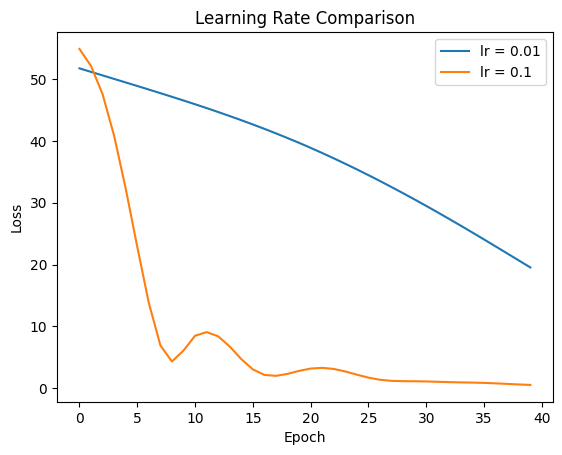

Final Loss (lr=0.01): 19.5300
Final Loss (lr=0.1): 0.5426


In [18]:
# Step 1 – Imports
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(0)

# Step 2 – Create synthetic regression data
X = torch.randn(200, 5)
y = 3*X.sum(dim=1, keepdim=True) + 2 + 0.3*torch.randn(200, 1)

# Step 3 – Model Definition
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(5, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Step 4 – Training function
def train_model(model, optimizer, criterion, X, y, epochs=40):
    losses = []
    for _ in range(epochs):
        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

criterion = nn.MSELoss()

# Step 5 – Two models with different learning rates
model_lr1 = RegressionNN()
opt_lr1 = optim.Adam(model_lr1.parameters(), lr=0.01)
loss_lr1 = train_model(model_lr1, opt_lr1, criterion, X, y)

model_lr2 = RegressionNN()
opt_lr2 = optim.Adam(model_lr2.parameters(), lr=0.1)
loss_lr2 = train_model(model_lr2, opt_lr2, criterion, X, y)

# Step 6 – Plot comparison
plt.plot(loss_lr1, label="lr = 0.01")
plt.plot(loss_lr2, label="lr = 0.1")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Rate Comparison")
plt.legend()
plt.show()

# Step 7 – Print final loss values
print(f"Final Loss (lr=0.01): {loss_lr1[-1]:.4f}")
print(f"Final Loss (lr=0.1): {loss_lr2[-1]:.4f}")

## **🧾 2–3 Line Answer (for exam)**

The model with lr = 0.01 converged smoothly and reached a lower final loss.
With lr = 0.1, loss oscillated due to large updates overshooting the minimum,
showing that too high a learning rate can make training unstable.

# **Compare Model Performance with One vs Two Hidden Layers**

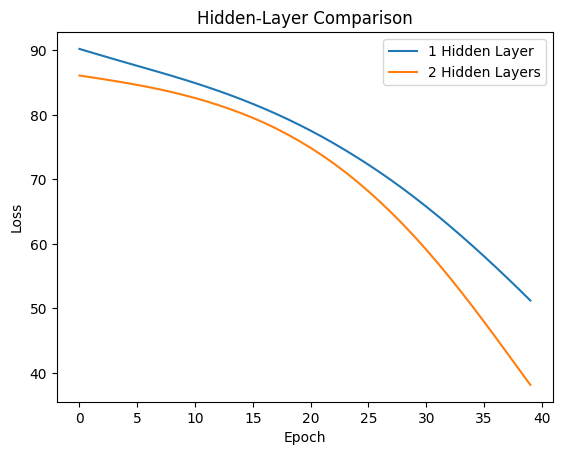

Final Loss (1-layer): 51.2317
Final Loss (2-layer): 38.1516


In [19]:
# Step 1 – Imports
import torch, torch.nn as nn, torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(0)

# Step 2 – Generate synthetic data
X = torch.randn(200, 10)
y = 3*X.sum(dim=1, keepdim=True) + 2 + 0.5*torch.randn(200, 1)

# Step 3 – Model A: One hidden layer
class ModelOne(nn.Module):
    def __init__(self):
        super(ModelOne, self).__init__()
        self.fc1 = nn.Linear(10, 6)
        self.fc2 = nn.Linear(6, 1)
    def forward(self, x):
        return self.fc2(torch.relu(self.fc1(x)))

# Step 4 – Model B: Two hidden layers
class ModelTwo(nn.Module):
    def __init__(self):
        super(ModelTwo, self).__init__()
        self.fc1 = nn.Linear(10, 6)
        self.fc2 = nn.Linear(6, 3)
        self.fc3 = nn.Linear(3, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Step 5 – Train function
def train_model(model, optimizer, criterion, X, y, epochs=40):
    losses = []
    for _ in range(epochs):
        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

criterion = nn.MSELoss()

# Model A (one layer)
modelA = ModelOne()
optA = optim.Adam(modelA.parameters(), lr=0.01)
lossA = train_model(modelA, optA, criterion, X, y)

# Model B (two layers)
modelB = ModelTwo()
optB = optim.Adam(modelB.parameters(), lr=0.01)
lossB = train_model(modelB, optB, criterion, X, y)

# Step 6 – Plot comparison
plt.plot(lossA, label='1 Hidden Layer')
plt.plot(lossB, label='2 Hidden Layers')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Hidden-Layer Comparison')
plt.legend(); plt.show()

# Step 7 – Print final loss
print(f"Final Loss (1-layer): {lossA[-1]:.4f}")
print(f"Final Loss (2-layer): {lossB[-1]:.4f}")

## **🧾 2-3 Line Answer (for xm)**

The two-hidden-layer model achieved a lower final MSE, showing improved capacity to capture non-linear relationships.
However, deeper models train slower and may overfit small datasets.

# **Compare Different Activation Function Combinations**

**🎯 Objective**

Train two regression models on the same dataset:

**Model A:** Uses ReLU activation in both hidden layers.

**Model B:** Uses ReLU in the first hidden layer and Tanh in the second.

Compare their loss curves, final performance, and interpret results.

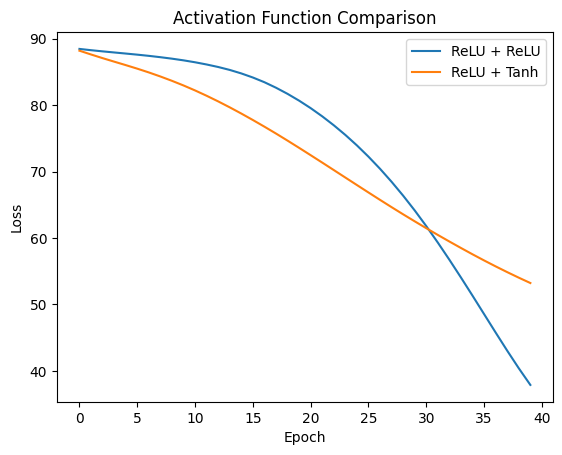

Final Loss (ReLU+ReLU): 37.8939
Final Loss (ReLU+Tanh): 53.2236


In [20]:
# Step 1 – Imports
import torch, torch.nn as nn, torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(0)

# Step 2 – Synthetic data
X = torch.randn(200, 10)
y = 3*X.sum(dim=1, keepdim=True) + 2 + 0.5*torch.randn(200, 1)

# Step 3 – Model A: ReLU + ReLU
class ModelReLU(nn.Module):
    def __init__(self):
        super(ModelReLU, self).__init__()
        self.fc1 = nn.Linear(10, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Step 4 – Model B: ReLU + Tanh
class ModelMix(nn.Module):
    def __init__(self):
        super(ModelMix, self).__init__()
        self.fc1 = nn.Linear(10, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return self.fc3(x)

# Step 5 – Train function
def train_model(model, optimizer, criterion, X, y, epochs=40):
    losses = []
    for _ in range(epochs):
        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

criterion = nn.MSELoss()

# Step 6 – Train both models
modelA = ModelReLU()
optA = optim.Adam(modelA.parameters(), lr=0.01)
lossA = train_model(modelA, optA, criterion, X, y)

modelB = ModelMix()
optB = optim.Adam(modelB.parameters(), lr=0.01)
lossB = train_model(modelB, optB, criterion, X, y)

# Step 7 – Plot comparison
plt.plot(lossA, label="ReLU + ReLU")
plt.plot(lossB, label="ReLU + Tanh")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Activation Function Comparison")
plt.legend(); plt.show()

# Step 8 – Print final loss values
print(f"Final Loss (ReLU+ReLU): {lossA[-1]:.4f}")
print(f"Final Loss (ReLU+Tanh): {lossB[-1]:.4f}")

## **🧾 2–3 Line Exam Answer**

The **ReLU+ReLU** model trained faster and reached a lower final MSE because ReLU avoids saturation and maintains strong gradients.

The **ReLU+Tanh** model learned more slowly since Tanh compresses values near ±1, reducing gradient strength.

# **Conceptual Questions**

⚙️ **A. Loss Function-related**

1️⃣ **Why is BCELoss appropriate for binary classification?**

BCELoss measures how close predicted probabilities (0–1) are to true binary labels. It’s ideal when the model output is a probability from a Sigmoid function.

2️⃣ W**hy is MSELoss used for regression problems?**

MSELoss calculates the squared difference between predicted and actual continuous values, which suits numerical output prediction.

3️⃣ **What happens if you use MSELoss for classification?**

It will treat 0/1 labels as continuous values, leading to slower convergence and poor probability interpretation.

4️⃣ **What happens if you remove the Sigmoid but still use BCELoss?**

Outputs won’t be between 0 and 1, so BCELoss will receive invalid inputs and produce unstable or incorrect gradients.

5️⃣ **Why must the loss be a scalar for .backward()?**

Autograd computes gradients for scalar losses only; a single loss value ensures one global error signal for all parameters.


**⚙️ B. Optimizer & Learning Rate**

6️⃣ **Why do we use Adam optimizer for regression?**

Adam automatically adapts learning rates for each parameter, giving faster and smoother convergence on continuous-valued outputs.

7️⃣ **Why do we use SGD for classification here?**

SGD (Stochastic Gradient Descent) is simple and effective for smaller binary tasks; it updates weights based on each batch.

8️⃣ **What happens if you increase the learning rate?**

The loss may fluctuate or diverge because updates become too large, skipping over the optimal minima.

9️⃣ **What happens if the learning rate is too small?**

Training becomes very slow, and the model may get stuck before reaching the best weights.

🔟 **What’s the main difference between SGD and Adam?**

SGD uses a constant learning rate; Adam adjusts learning rates dynamically using gradient momentum and variance.


⚙️ **C. Activation Functions**

1️⃣ **Why do we use ReLU in hidden layers?**

ReLU adds non-linearity and avoids vanishing gradients, allowing deep networks to learn complex patterns efficiently.

2️⃣ **Why do we use Sigmoid in the output layer for binary classification?**

Sigmoid squashes outputs to the [0,1] range, making them interpretable as probabilities for BCELoss.

3️⃣ **Why not use ReLU in the output layer for classification?**

ReLU can produce outputs >1 or <0, which are invalid probabilities for binary tasks.

4️⃣ **What happens if we don’t use any activation functions?**

The network becomes purely linear, losing its ability to learn complex or non-linear relationships.


⚙️ **D. Data & Normalization**

5️⃣ ** Why do we normalize input data between 0–1?**

It keeps values in a consistent range, prevents large gradients, and stabilizes training.

6️⃣ **Why do we use torch.manual_seed()?**

It fixes the random seed, ensuring reproducible results each time you run the code.

7️⃣ **What does adding noise to data simulate?**

It mimics real-world imperfections and tests model robustness, but too much noise can slow training.


⚙️ **E. Gradient & Backpropagation**

8️⃣ **Why do we use optimizer.zero_grad() before each backward pass?**

To reset old gradients; otherwise, they accumulate and distort weight updates.

9️⃣ **What happens if you call .backward() twice without clearing gradients?**

Gradients add up from multiple passes, causing incorrect or oversized updates.

0️⃣ **What does loss.backward() do?**

It computes gradients (∂loss/∂weights) through the computation graph using automatic differentiation.

1️⃣ **What does optimizer.step() do?**

It updates model parameters using the gradients computed by autograd.


⚙️ **F. Model Behavior & Evaluation**

2️⃣ ** What does a decreasing loss mean?**

The model’s predictions are getting closer to true labels — it’s learning properly.

3️⃣ **What happens if loss stops decreasing?**

The model has plateaued; it might need a lower learning rate, more epochs, or a different optimizer.

4️⃣ **Why do we plot loss over epochs?**

To visualize training progress and detect issues like overfitting or poor convergence.

5️⃣ **What does overfitting mean in this context?**

The model performs well on training data but poorly on new data — it memorized rather than generalized.


⚙️ **G. Model Architecture / Layers**

6️⃣ **What does nn.Linear(a, b) mean?**

It creates a fully connected layer that maps a input features to b outputs using learnable weights and bias.

7️⃣ ** Why do we use multiple layers instead of one?**

Each layer learns higher-level abstractions; multiple layers allow modeling complex, non-linear relationships.

8️⃣ ** What happens if you add too many layers?**

It can overfit small datasets or make training unstable if not regularized.


⚙️ **H. Miscellaneous**

9️⃣ **Why is batch size important?**

It balances learning stability and speed — too small → noisy updates, too large → slow convergence.

0️⃣ **Why do we set requires_grad=True for model parameters?**

It tells autograd to track these tensors and compute their gradients during backpropagation.

